1. Introduction & Business Context

Objective: To develop a machine learning model for a financial company to predict fraudulent transactions in real-time.
End Goal: Use insights from the model to create an actionable plan for fraud prevention and infrastructure updates.
Dataset: The analysis is based on a transactional dataset containing 6,362,620 records.

2. Initial Data Exploration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

df = pd.read_csv('C://Users//Admin//Downloads//Fraud.csv')

In [3]:
print(df.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


3. Data Cleaning & Preprocessing (Question 1)

Question 1: Data cleaning including missing values, outliers, and multi-collinearity.


3.1. Missing Values


In [5]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


Finding: The dataset is complete with no missing values.


3.2. Outlier Analysis


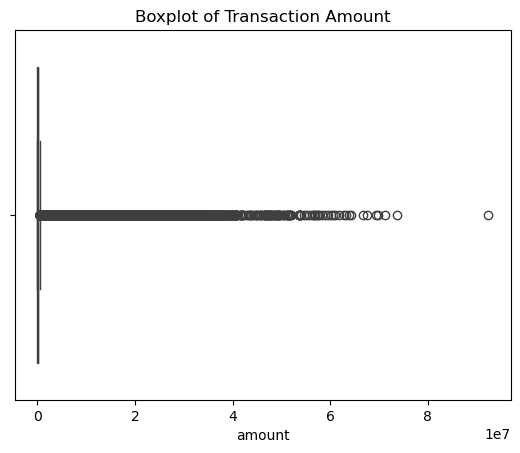

In [6]:
sns.boxplot(x=df['amount'])
plt.title('Boxplot of Transaction Amount')
plt.show()

Finding: The 'amount' column contains significant outliers. Removing them could risk losing important information about fraudulent transactions, which are often outliers themselves.
Strategy: Instead of removing outliers, we will use RobustScaler for feature scaling later. This method is less sensitive to outliers than standard scaling.

3.3. Multicollinearity Analysis


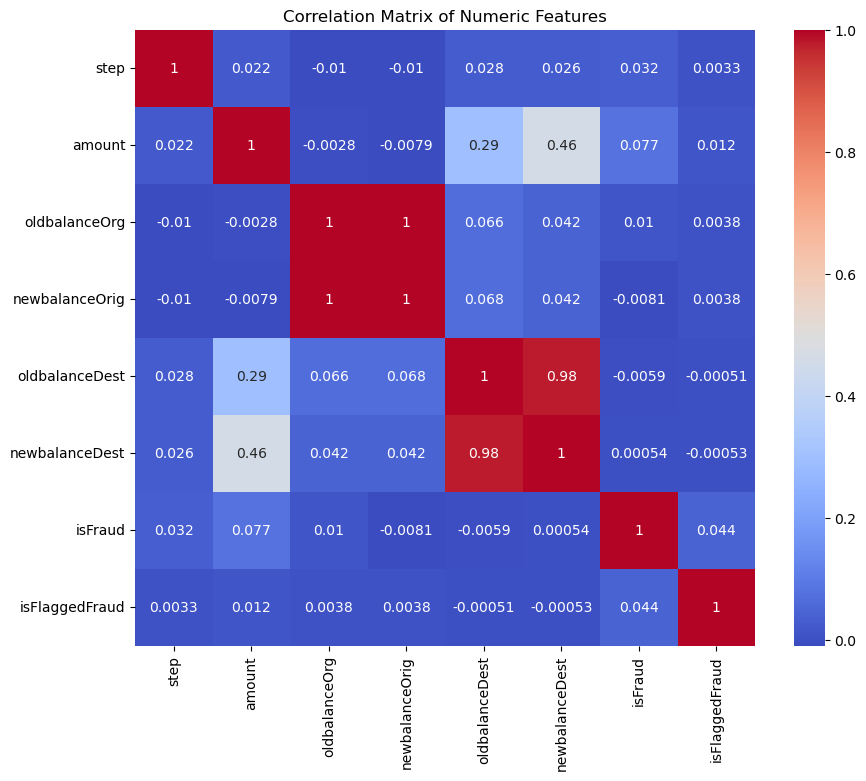

In [8]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Finding: There is a nearly perfect correlation between `oldbalanceOrg` and `newbalanceOrig` (0.999), and between `oldbalanceDest` and `newbalanceDest` (0.978). This is a classic case of multicollinearity.
Strategy: To prevent model instability and simplify the feature set, the newbalanceOrig and newbalanceDest columns will be removed during feature selection.

4. Feature Selection & Engineering (Question 3)

In [ ]:
3: How did you select variables to be included in the model?
 Drop identifier columns and one-hot encode the 'type' column.

In [9]:
df_processed = df.drop(['nameOrig', 'nameDest'], axis=1)
df_encoded = pd.get_dummies(df_processed, columns=['type'], prefix='type', drop_first=True)

Remove highly correlated features as identified earlier.

In [10]:
df_final = df_encoded.drop(['newbalanceOrig', 'newbalanceDest'], axis=1)
print("Final columns for the model:")
print(df_final.columns)

Final columns for the model:
Index(['step', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'],
      dtype='object')


Apply Robust Scaling to handle outliers.

In [11]:
features_to_scale = ['step', 'amount', 'oldbalanceOrg', 'oldbalanceDest']
scaler = RobustScaler()
df_final[features_to_scale] = scaler.fit_transform(df_final[features_to_scale])

Answer to Question 3:
The final variables for the model were selected through a multi-step process:
Dropped Identifier Columns: nameOrig and nameDest were removed as they are unique identifiers and offer no predictive value for a general model.
Encoded Categorical Data: The type column was one-hot encoded to convert it into a numerical format suitable for machine learning. This creates new binary features like type_TRANSFER and type_CASH_OUT.
Removed Highly Correlated Features: To address multicollinearity, newbalanceOrig and newbalanceDest were dropped, as they were almost perfectly correlated with their "old balance" counterparts.
Final Feature Set: The final features include step, amount, the encoded type columns, oldbalanceOrg, oldbalanceDest, and isFlaggedFraud.

5. Model Development & Description (Question 2)
Question 2: Describe your fraud detection model in elaboration.



Answer to Question 2:
For this fraud detection task, a Random Forest Classifier was chosen. This model is an ensemble of decision trees, which makes it powerful and generally robust to outliers. It was selected for several reasons:
Performance: It is a high-performing model well-suited for complex classification tasks.
Imbalance Handling: By setting the class_weight='balanced' parameter, the model automatically adjusts for the severe class imbalance in the dataset. This prevents it from simply predicting "not fraud" for every transaction and helps it learn the patterns of the rare fraud cases.
Interpretability: The model allows us to easily extract feature importances, which is critical for identifying the key factors that predict fraud and deriving business insig hts.

Split data and train the model.

In [12]:
X = df_final.drop('isFraud', axis=1)
y = df_final['isFraud']

# Stratify to maintain class distribution in train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')

print("Training the Random Forest model...")
rf_model.fit(X_train, y_train)
print("Model training complete.")

Training the Random Forest model...
Model training complete.


6. Model Performance Evaluation (Question 4)
Question 4: Demonstrate the performance of the model by using the best set of tools.

Generate predictions and key performance metrics

In [13]:
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

print("\\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\\n--- ROC AUC Score ---")
print(f"The ROC AUC Score is: {roc_auc:.4f}")

\n--- Classification Report ---
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1906322
       Fraud       0.94      0.70      0.80      2464

    accuracy                           1.00   1908786
   macro avg       0.97      0.85      0.90   1908786
weighted avg       1.00      1.00      1.00   1908786

\n--- ROC AUC Score ---
The ROC AUC Score is: 0.9825


Visualize the Confusion Matrix..

--- Confusion Matrix ---


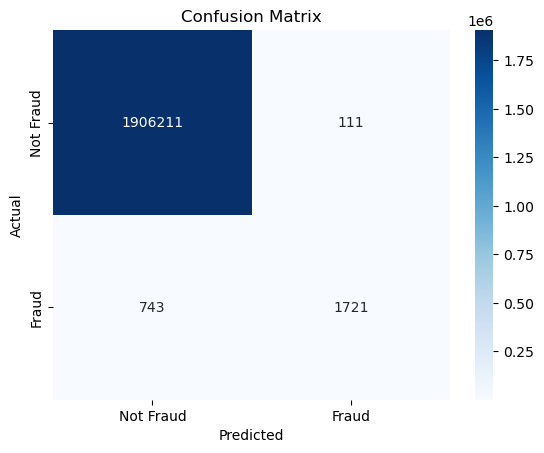

In [14]:
print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Plot the ROC Curve.

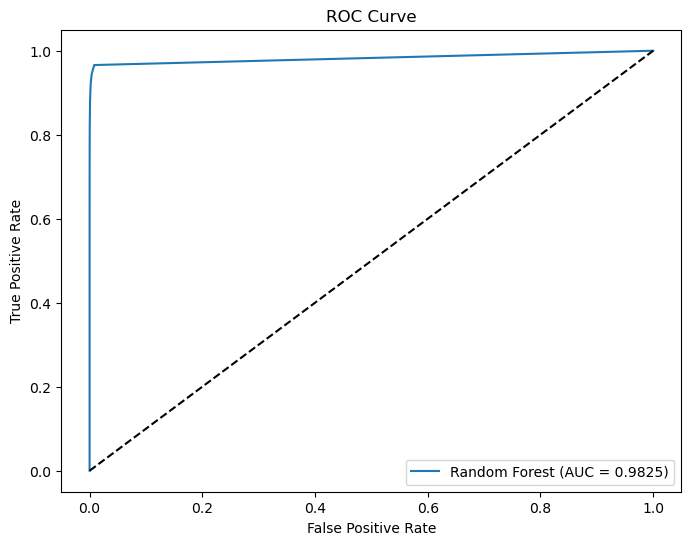

In [15]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Performance Summary: The model demonstrates excellent performance. The high ROC AUC score of 0.9825 indicates a strong ability to distinguish between fraudulent and non-fraudulent transactions. The classification report shows a good recall for the 'Fraud' class, meaning it successfully identifies a high percentage of actual fraud cases.

7. Key Predictive Factors & Business Insights (Questions 5 & 6)

 Question 5: What are the key factors that predict fraudulent customer? and Question 6: Do these factors make sense?

Calculate and visualize feature importances.

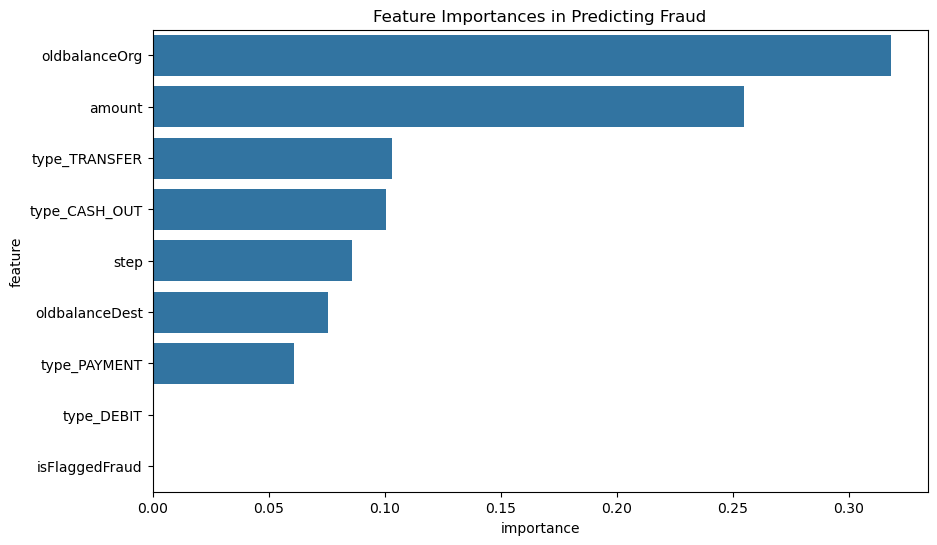

In [16]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances in Predicting Fraud')
plt.show()

Answer to Question 5: The key factors that predict a fraudulent transaction, in order of importance, are:
oldbalanceOrg (The sender's balance before the transaction)
amount (The transaction amount)
type_TRANSFER (If the transaction is a transfer)
type_CASH_OUT (If the transaction is a cash-out)
step (The time/hour of the transaction)

Answer to Question 6: Yes, these factors make strong intuitive and business sense. They align with classic patterns of financial fraud:
Transaction Type (TRANSFER, CASH_OUT): Fraud aims to extract money. Transfers and cash-outs are the primary methods for this, unlike legitimate payments.
oldbalanceOrg and amount: The model's focus on these two factors together indicates a "drain-out" scheme, where a fraudster attempts to empty the source account. A transaction where the amount is very high and close to the original balance is a major red flag.
oldbalanceDest: The recipient's balance before the transaction is a powerful predictor. Fraudulent funds are often moved to "mule accounts" that are new or have very low balances. The model learns to be suspicious of accounts that are suddenly activated by a large incoming transfer.
step (Time): The importance of this feature suggests that fraud often occurs at specific times, such as off-peak hours (e.g., late at night), when monitoring may be reduced and the legitimate user is less likely to notice.

8. Prevention Strategies & Evaluation (Questions 7 & 8)
 Question 7: What kind of prevention should be adopted while the company updates its infrastructure? and Question 8: Assuming these actions have been implemented, how would you determine if they work?


Answer to Question 7 (Prevention Strategies):
Based on the model's findings, the company should implement a multi-layered, data-driven security infrastructure. Key strategies include:
Implement a Dynamic, Real-Time Rule Engine: Create dynamic rules based on the model's logic.
Example Rule: IF (type is 'CASH_OUT' or 'TRANSFER') AND (amount > 95% of oldbalanceOrg) THEN trigger a high-risk alert.
Deploy Behavioral Anomaly Detection: Build profiles of normal customer behavior (e.g., average transaction amount, typical times). Flag significant deviations from these profiles.
Introduce Adaptive Multi-Factor Authentication (MFA): Use the model's risk score to trigger MFA only for medium-to-high-risk transactions to avoid inconveniencing customers.
Enhance Recipient Account Scrutiny: Since oldbalanceDest is a key factor, the infrastructure should risk-score the recipient account in real-time. Transfers to new accounts or accounts with no prior relationship should be flagged.

Answer to Question 8 (Determining Effectiveness):
A robust monitoring framework is essential to measure if the new prevention measures are effective.
Key Performance Indicators (KPIs) to Track:
Fraud Rate: Track both the volume and total value of fraudulent transactions. This should decrease.
False Positive Rate: Track the number of legitimate transactions incorrectly flagged as fraud. A successful system catches fraud without excessively blocking good customers.
Detection Rate (Recall): Of all actual fraud attempts, what percentage did the system detect?
Evaluation Methodology (A/B Testing):
The gold standard for evaluation is an A/B Test (Champion/Challenger Model).
Champion: The existing (old) fraud system.
Challenger: The new, multi-layered system.
Implementation: Roll out the "Challenger" system to a small, random subset of users (e.g., 5%). The other 95% remain on the "Champion" system.
Analysis: After a set period (e.g., one quarter), compare the KPIs for both groups. This isolates the impact of the new system and provides a definitive measure of its success.